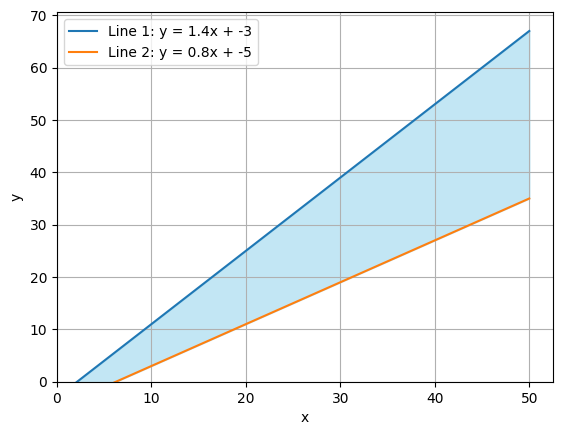

Total number of points within the bounds: 877
All points within the bounds: [(0, -5), (0, -4), (0, -3), (1, -4), (1, -3), (1, -2), (2, -3), (2, -2), (2, -1), (3, -2), (3, -1), (3, 0), (3, 1), (4, -1), (4, 0), (4, 1), (4, 2), (5, -1), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9), (10, 3), (10, 4), (10, 5), (10, 6), (10, 7), (10, 8), (10, 9), (10, 10), (10, 11), (11, 4), (11, 5), (11, 6), (11, 7), (11, 8), (11, 9), (11, 10), (11, 11), (11, 12), (12, 5), (12, 6), (12, 7), (12, 8), (12, 9), (12, 10), (12, 11), (12, 12), (12, 13), (13, 6), (13, 7), (13, 8), (13, 9), (13, 10), (13, 11), (13, 12), (13, 13), (13, 14), (13, 15), (14, 7), (14, 8), (14, 9), (14, 10), (14, 11), (14, 12), (14, 13), (14, 14), (14, 15), (14, 16), (15, 7), (15, 8), (15, 9), (15, 10), (15, 11), (15, 12), (15, 13), (15, 1

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def plot_filled_area_between_lines(c1, c2, x_range=(0, 50)):
    m1 = 1.4
    m2 = 0.8
    x_values = np.linspace(x_range[0], x_range[1], 400)
    y1 = m1 * x_values + c1
    y2 = m2 * x_values + c2

    plt.plot(x_values, y1, label=f'Line 1: y = {m1}x + {c1}')
    plt.plot(x_values, y2, label=f'Line 2: y = {m2}x + {c2}')

    plt.fill_between(x_values, y1, y2, where=(y1 >= y2) & ((y1 >= 0) | (y2 >= 0)), color='skyblue', alpha=0.5)
    plt.fill_between(x_values, y1, y2, where=(y2 >= y1) & ((y1 >= 0) | (y2 >= 0)), color='skyblue', alpha=0.5)


    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.xlim(left=0)
    plt.ylim(bottom=0)
    plt.show()

def points_within_bounds(c1, c2, x_range=(0, 50), m1=1.4, m2=0.8):
    points = []  
    
    for x in range(x_range[0], x_range[1] + 1):
        y1 = m1 * x + c1
        y2 = m2 * x + c2
        lower_bound = min(y1, y2)
        upper_bound = max(y1, y2)
        
        for y in range(int(np.floor(lower_bound)), int(np.ceil(upper_bound)) + 1):
            if lower_bound <= y <= upper_bound:
                points.append((x, y))
                
    return points


c1 = -3
c2 = -5
plot_filled_area_between_lines(c1, c2)

all_points = points_within_bounds(c1, c2)
print(f"Total number of points within the bounds: {len(all_points)}")


print(f"All points within the bounds: {all_points}")


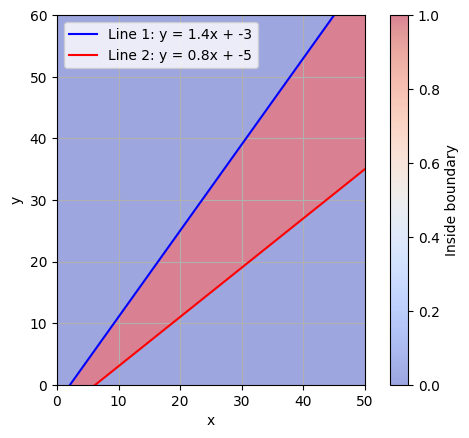

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_heatmap_between_lines(c1, c2, x_range=(0, 50), y_range=(0, 60)):
    m1 = 1.4
    m2 = 0.8
    x = np.linspace(x_range[0], x_range[1], 400)
    y = np.linspace(y_range[0], y_range[1], 400)
    X, Y = np.meshgrid(x, y)
    
    
    Y1 = m1 * X + c1
    Y2 = m2 * X + c2

    inside_boundary = (Y >= np.minimum(Y1, Y2)) & (Y <= np.maximum(Y1, Y2))

    # heatmap
    plt.imshow(inside_boundary, extent=(x.min(), x.max(), y.min(), y.max()), origin='lower', cmap='coolwarm', alpha=0.5)

    # clarity lines
    plt.plot(x, m1*x + c1, label=f'Line 1: y = {m1}x + {c1}', color='blue')
    plt.plot(x, m2*x + c2, label=f'Line 2: y = {m2}x + {c2}', color='red')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.xlim(x_range)
    plt.ylim(y_range)
    plt.colorbar(label='Inside boundary')
    plt.show()

c1 = -3
c2 = -5
plot_heatmap_between_lines(c1, c2)


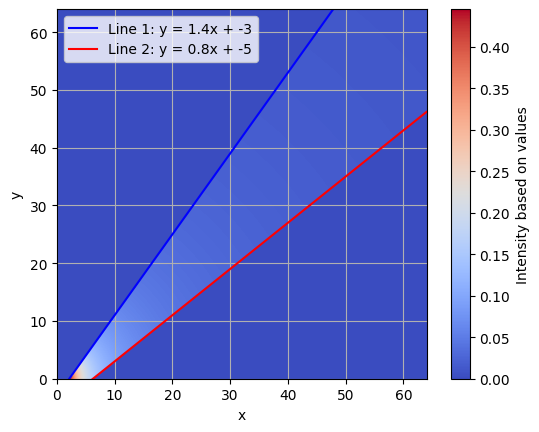

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def plot_heatmap_with_custom_outside_color(c1, c2, x_range=(0, 64), y_range=(0, 64)):
    m1 = 1.4
    m2 = 0.8
    x = np.linspace(x_range[0], x_range[1], 400)
    y = np.linspace(y_range[0], y_range[1], 400)
    X, Y = np.meshgrid(x, y)
    
   
    Y1 = m1 * X + c1
    Y2 = m2 * X + c2
    
    
    inside_boundary = (Y >= np.minimum(Y1, Y2)) & (Y <= np.maximum(Y1, Y2))
    
    
    epsilon = 1e-10  
    intensity = 1 / np.sqrt(X**2 + Y**2 + epsilon)
    
    
    outside_value = 0  
    intensity_masked = np.where(inside_boundary, intensity, outside_value)

    
    plt.imshow(intensity_masked, extent=(x.min(), x.max(), y.min(), y.max()), origin='lower', cmap='coolwarm', alpha=1)
    
   
    plt.plot(x, m1*x + c1, label=f'Line 1: y = {m1}x + {c1}', color='blue')
    plt.plot(x, m2*x + c2, label=f'Line 2: y = {m2}x + {c2}', color='red')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.xlim(x_range)
    plt.ylim(y_range)
    plt.colorbar(label='Intensity based on values')
    plt.show()

c1 = -3
c2 = -5
plot_heatmap_with_custom_outside_color(c1, c2)

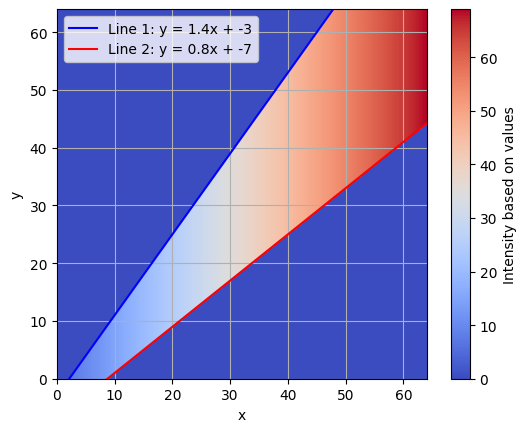

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def plot_heatmap_with_custom_outside_color(c1, c2, x_range=(0, 64), y_range=(0, 64)):
    m1 = 1.4
    m2 = 0.8
    x = np.linspace(x_range[0], x_range[1], 400)
    y = np.linspace(y_range[0], y_range[1], 400)
    X, Y = np.meshgrid(x, y)
    
   
    Y1 = m1 * X + c1
    Y2 = m2 * X + c2
    
    
    inside_boundary = (Y >= np.minimum(Y1, Y2)) & (Y <= np.maximum(Y1, Y2))
    
    
     
    intensity = y+5
    
    
    outside_value = 0  
    intensity_masked = np.where(inside_boundary, intensity, outside_value)

    
    plt.imshow(intensity_masked, extent=(x.min(), x.max(), y.min(), y.max()), origin='lower', cmap='coolwarm', alpha=1)
    
   
    plt.plot(x, m1*x + c1, label=f'Line 1: y = {m1}x + {c1}', color='blue')
    plt.plot(x, m2*x + c2, label=f'Line 2: y = {m2}x + {c2}', color='red')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.xlim(x_range)
    plt.ylim(y_range)
    plt.colorbar(label='Intensity based on values')
    plt.show()

c1 = -3
c2 = -7
plot_heatmap_with_custom_outside_color(c1, c2)